In [1]:
import json
import requests # to download some resources
import os # file operations
import numpy as np # linear algebra
import pandas as pd # data processing

### Combining all countries - overview

In [8]:
# Consolidating answers from the whole sample
# Folder Path
testing_json = f"../data/4-summary-responses-json/version_yesno_updated/Testing_Sample"
design_json = f"../data/4-summary-responses-json/version_yesno_updated/Design_Sample"
full_json = f"../data/4-summary-responses-json/version_yesno_updated/Testing_FullSample"

# Lista para almacenar los DataFrames
dfs = []

# Recorrer todos los archivos en la carpeta
for file_name in os.listdir(design_json):
    if file_name.endswith(".json"): 
        file_path = os.path.join(design_json, file_name) 
        
        df = pd.read_json(file_path)
        dfs.append(df)

for file_name in os.listdir(testing_json):
    if file_name.endswith(".json"): 
        file_path = os.path.join(testing_json, file_name) 
    
        df = pd.read_json(file_path)
        dfs.append(df)

for file_name in os.listdir(full_json):
    if file_name.endswith(".json"): 
        file_path = os.path.join(full_json, file_name) 
        
        df = pd.read_json(file_path) 
        dfs.append(df)

# Concatenar todos los DataFrames en uno solo
combined_data = pd.concat(dfs, ignore_index=True)

# Collapse by country and question
combined_data = combined_data.groupby(['country', 'question'], as_index=False).agg({
    'answer': lambda x: ', '.join(x.dropna().astype(str).tolist()),
    'supporting_chunks': 'first',
    'answer_full': 'first',
    'supporting_text': 'first'
})

combined_data['question'] = combined_data['question'].astype(str)
combined_data['country'] = combined_data['country'].astype(str)
combined_data = combined_data.rename(columns={"answer": "answer_chunking"})

combined_data = combined_data.drop(columns=['supporting_chunks', 'supporting_text'])

# Keep one answer, answer_full preferred over answer_chunking. If answer_full is missing, use answer_chunking
combined_data['answer'] = combined_data['answer_full']
combined_data.loc[combined_data['answer'].isnull(), 'answer'] = combined_data['answer_chunking']

full_data_countries = combined_data[['country', 'question', 'answer']]

full_data_countries['country'] = full_data_countries['country'].str.replace('"', '', regex=False)

# Save the data
output_path = f"../data/6-performance/combined_all_countries_overview.xlsx"  # Nombre del archivo Excel
full_data_countries.to_excel(output_path, index=False)

/var/folders/mw/rc0rz1pd0l750kf2mdl_jhbh0000gn/T/ipykernel_18906/2465783671.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_countries['country'] = full_data_countries['country'].str.replace('"', '', regex=False)


In [9]:
full_data_countries.country.unique()

array(['albania', 'bruneibuthan', 'eswatini', 'fiji', 'kuwait', 'lebanon',
       'liberia', 'maldives', 'micronesia', 'nepal', 'nigeria',
       'palestine', 'saudi arabia', 'sri lanka', 'turkmenistan',
       'afghanistan', 'arab_emirates', 'argentina', 'australia',
       'bangladesh', 'barbados', 'canada', 'cayman_islands', 'chile',
       'colombia', 'costa_rica', 'denmark', 'egypt', 'el_salvador',
       'eritrea', 'ethiopia', 'finland', 'france', 'germany', 'ghana',
       'india', 'iran', 'ireland', 'kenya', 'libya', 'malawi', 'malaysia',
       'malta', 'mauritius', 'mongolia', 'myanmar', 'namibia', 'nauru',
       'netherlands', 'norway', 'oman', 'pakistan', 'papua_new_guinea',
       'paraguay', 'peru', 'qatar', 'rep_of_macedonia', 'rwanda', 'samoa',
       'sierra_leone', 'solomon_islands', 'somalia', 'south africa',
       'spain', 'sudan', 'sweden', 'switzerland', 'syria', 'tajikistan',
       'tanzania', 'thailand', 'timor', 'tonga', 'tunisia', 'tuvalu',
       'united_k

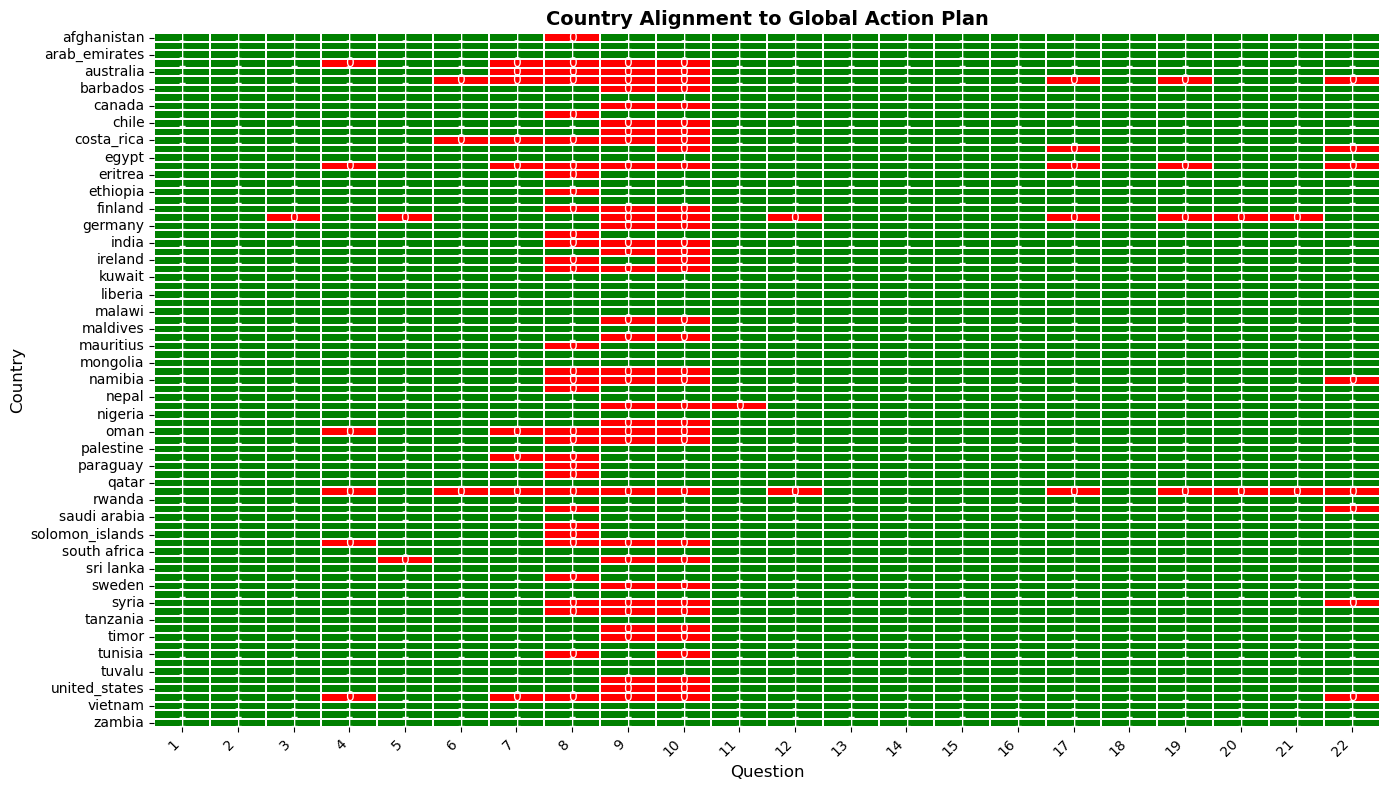

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "../data/6-performance/combined_all_countries_overview.xlsx"
df = pd.read_excel(file_path)

# Convert 'answer' to numeric (Yes = 1, No = 0)
df['answer'] = df['answer'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Create a pivot table (Countries x Questions)
heatmap_data = df.pivot(index="country", columns="question", values="answer")

# Drop unnecessary columns
heatmap_data = heatmap_data.drop(columns=['period_start', 'period_end'], errors='ignore')

# Convert column names to integers and sort numerically
heatmap_data.columns = heatmap_data.columns.astype(int)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# Plot the heatmap with improved aesthetics
plt.figure(figsize=(14, 8))

# Custom colormap: Green for "Yes" (1), Red for "No" (0)
cmap = sns.color_palette(["red", "green"])

# Create the heatmap
sns.heatmap(
    heatmap_data, 
    cmap=cmap, 
    linewidths=0.3,  # Thinner grid lines for a cleaner look
    annot=True, 
    fmt="d", 
    cbar=False  # Remove color bar for simplicity
)

# Customize labels
plt.title("Country Alignment to Global Action Plan", fontsize=14, fontweight="bold")
plt.xlabel("Question", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Improve layout
plt.tight_layout()

plt.show()


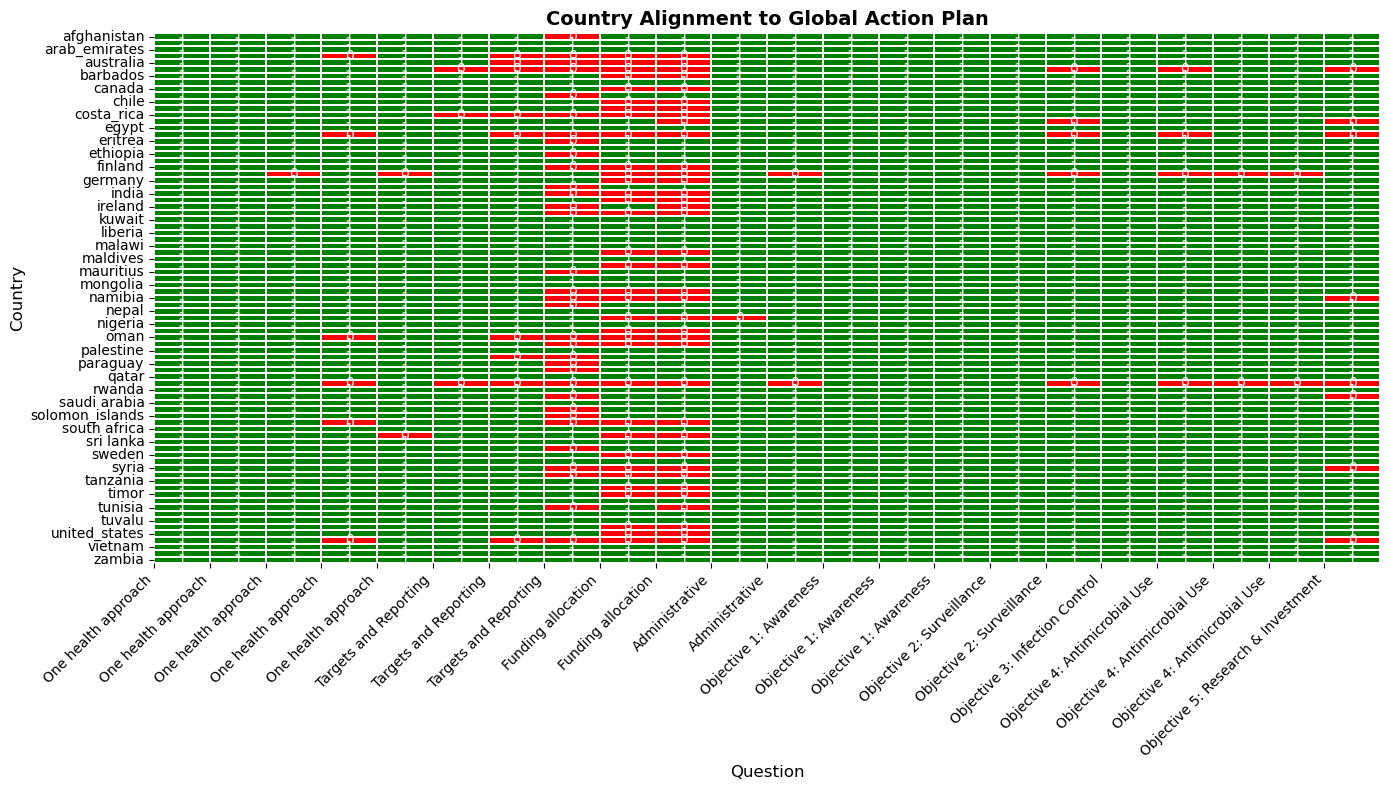

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "../data/6-performance/combined_all_countries_overview.xlsx"
df = pd.read_excel(file_path)

# Convert 'answer' to numeric (Yes = 1, No = 0)
df['answer'] = df['answer'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Create a pivot table (Countries x Questions)
heatmap_data = df.pivot(index="country", columns="question", values="answer")

# Drop unnecessary columns
heatmap_data = heatmap_data.drop(columns=['period_start', 'period_end'], errors='ignore')

# Convert column names to integers and sort numerically
heatmap_data.columns = heatmap_data.columns.astype(int)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# Define the categories for the questions
categories = {
    "One health approach": [1, 2, 3, 4, 5],
    "Targets and Reporting": [6,7,8],
    "Funding allocation": [9,10],
    "Administrative": [11,12],
    "Objective 1: Awareness": [13, 14,15],
    "Objective 2: Surveillance": [16, 17],
    "Objective 3: Infection Control": [18],
    "Objective 4: Antimicrobial Use": [19, 20, 21],
    "Objective 5: Research & Investment": [22]
}

# Generate category labels for each question in heatmap_data.columns
category_labels = []
for col in heatmap_data.columns:
    label_assigned = False
    for category, questions in categories.items():
        if col in questions:
            category_labels.append(category)
            label_assigned = True
            break
    if not label_assigned:
        category_labels.append("")  # Empty label if no category is found (should not happen)

# Plot the heatmap with improved aesthetics
plt.figure(figsize=(14, 8))

# Custom colormap: Green for "Yes" (1), Red for "No" (0)
cmap = sns.color_palette(["red", "green"])

# Create the heatmap
sns.heatmap(
    heatmap_data, 
    cmap=cmap, 
    linewidths=0.3,  # Thinner grid lines for a cleaner look
    annot=True, 
    fmt="d", 
    cbar=False  # Remove color bar for simplicity
)

# Customize labels
plt.title("Country Alignment to Global Action Plan", fontsize=14, fontweight="bold")
plt.xlabel("Question", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Annotate x-axis with categories
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=category_labels, rotation=45, ha="right", fontsize=10)

# Improve layout
plt.tight_layout()

plt.show()

In [35]:
# Calculate the percentage of 'Yes' answers for each country
country_alignment = heatmap_data.mean(axis=1) * 100  # Mean per country * 100 for percentage

# Calculate the overall percentage of 'Yes' answers across all countries
overall_alignment = heatmap_data.values.mean() * 100

# Print the overall alignment
print(f"Overall alignment: {overall_alignment:.2f}%")

# Print the percentage for each country
print("Country-wise alignment percentage:")
print(country_alignment)


Overall alignment: 91.64%
Country-wise alignment percentage:
country
afghanistan       95.454545
albania          100.000000
arab_emirates    100.000000
argentina         77.272727
australia         81.818182
                    ...    
united_states     90.909091
uruguay           72.727273
vietnam          100.000000
yemen            100.000000
zambia           100.000000
Length: 81, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_21508\3069545272.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=regional_alignment.index, y=regional_alignment.values, palette='viridis')


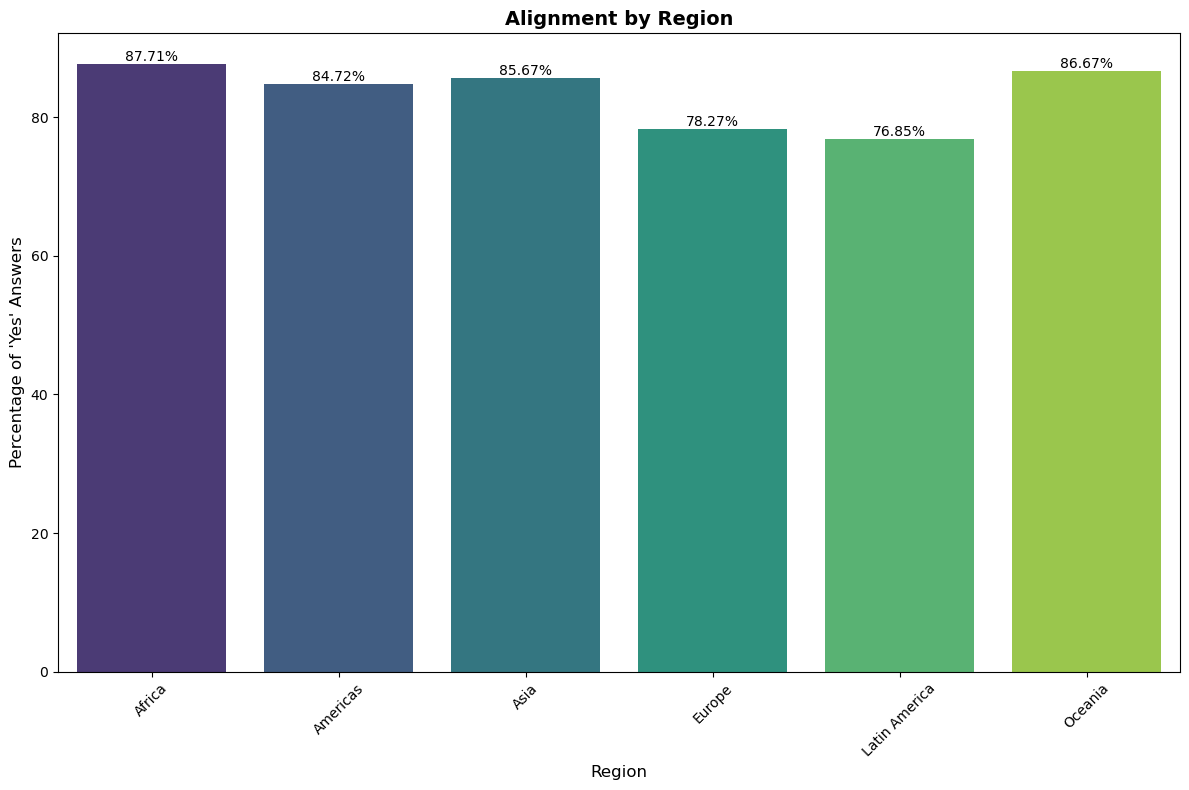

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of countries
countries = ['albania', 'bruneibuthan', 'eswatini', 'fiji', 'kuwait', 'lebanon',
             'liberia', 'maldives', 'micronesia', 'nepal', 'nigeria', 'palestine', 
             'saudi arabia', 'sri lanka', 'turkmenistan', 'afghanistan', 'arab_emirates', 
             'argentina', 'australia', 'bangladesh', 'barbados', 'canada', 'cayman_islands', 
             'chile', 'colombia', 'costa_rica', 'denmark', 'egypt', 'el_salvador', 'eritrea', 
             'ethiopia', 'finland', 'france', 'germany', 'ghana', 'india', 'iran', 'ireland', 
             'kenya', 'libya', 'malawi', 'malaysia', 'malta', 'mauritius', 'mongolia', 'myanmar', 
             'namibia', 'nauru', 'netherlands', 'norway', 'oman', 'pakistan', 'papua_new_guinea', 
             'paraguay', 'peru', 'qatar', 'rep_of_macedonia', 'rwanda', 'samoa', 'sierra_leone', 
             'solomon_islands', 'somalia', 'south africa', 'spain', 'sudan', 'sweden', 'switzerland', 
             'syria', 'tajikistan', 'tanzania', 'thailand', 'timor', 'tonga', 'tunisia', 'tuvalu', 
             'united_kingdom', 'united_states', 'uruguay', 'vietnam', 'yemen', 'zambia']

# Define updated region mapping (separate Latin American countries)
region_mapping = {
    'albania': 'Europe', 'bruneibuthan': 'Asia', 'eswatini': 'Africa', 'fiji': 'Oceania', 'kuwait': 'Asia', 'lebanon': 'Asia',
    'liberia': 'Africa', 'maldives': 'Asia', 'micronesia': 'Oceania', 'nepal': 'Asia', 'nigeria': 'Africa', 'palestine': 'Asia',
    'saudi arabia': 'Asia', 'sri lanka': 'Asia', 'turkmenistan': 'Asia', 'afghanistan': 'Asia', 'arab_emirates': 'Asia',
    'argentina': 'Latin America', 'australia': 'Oceania', 'bangladesh': 'Asia', 'barbados': 'Latin America', 'canada': 'Americas', 
    'cayman_islands': 'Americas', 'chile': 'Latin America', 'colombia': 'Latin America', 'costa_rica': 'Latin America', 'denmark': 'Europe', 
    'egypt': 'Africa', 'el_salvador': 'Latin America', 'eritrea': 'Africa', 'ethiopia': 'Africa', 'finland': 'Europe', 'france': 'Europe', 
    'germany': 'Europe', 'ghana': 'Africa', 'india': 'Asia', 'iran': 'Asia', 'ireland': 'Europe', 'kenya': 'Africa', 'libya': 'Africa', 
    'malawi': 'Africa', 'malaysia': 'Asia', 'malta': 'Europe', 'mauritius': 'Africa', 'mongolia': 'Asia', 'myanmar': 'Asia', 'namibia': 'Africa', 
    'nauru': 'Oceania', 'netherlands': 'Europe', 'norway': 'Europe', 'oman': 'Asia', 'pakistan': 'Asia', 'papua_new_guinea': 'Oceania', 
    'paraguay': 'Latin America', 'peru': 'Latin America', 'qatar': 'Asia', 'rep_of_macedonia': 'Europe', 'rwanda': 'Africa', 'samoa': 'Oceania', 
    'sierra_leone': 'Africa', 'solomon_islands': 'Oceania', 'somalia': 'Africa', 'south africa': 'Africa', 'spain': 'Europe', 'sudan': 'Africa', 
    'sweden': 'Europe', 'switzerland': 'Europe', 'syria': 'Asia', 'tajikistan': 'Asia', 'tanzania': 'Africa', 'thailand': 'Asia', 'timor': 'Oceania', 
    'tonga': 'Oceania', 'tunisia': 'Africa', 'tuvalu': 'Oceania', 'united_kingdom': 'Europe', 'united_states': 'Americas', 'uruguay': 'Latin America', 
    'vietnam': 'Asia', 'yemen': 'Asia', 'zambia': 'Africa'
}

# Map the regions to the countries
df['region'] = df['country'].map(region_mapping)

# Now let's calculate regional alignment as the average 'Yes' percentage for each region
df['alignment'] = df['answer']  # Assuming 'answer' is 1 for Yes and 0 for No
regional_alignment = df.groupby('region')['alignment'].mean() * 100  # Multiply by 100 to get percentage

# Plot the regional alignment comparison
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=regional_alignment.index, y=regional_alignment.values, palette='viridis')

# Annotate the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Customize labels
plt.title("Alignment by Region", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Percentage of 'Yes' Answers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)
heatmap_data['Cluster'] = dbscan.fit_predict(scaled_data)

# Display results
print(heatmap_data[['Cluster']])


question       Cluster
country               
afghanistan          0
albania              1
arab_emirates        1
argentina           -1
australia           -1
...                ...
united_states        2
uruguay             -1
vietnam              1
yemen                1
zambia               1

[81 rows x 1 columns]


In [99]:
# Summarize the countries in each cluster
cluster_summary = heatmap_data.groupby('Cluster').size()
print(cluster_summary)

# Display the countries in each cluster
for cluster in range(4):  # 3 clusters
    print(f"\nCountries in Cluster {cluster}:")
    print(heatmap_data[heatmap_data['Cluster'] == cluster].index.tolist())

Cluster
-1    19
 0    12
 1    30
 2    14
 3     6
dtype: int64

Countries in Cluster 0:
['afghanistan', 'cayman_islands', 'eritrea', 'ethiopia', 'ghana', 'mauritius', 'nauru', 'paraguay', 'peru', 'sierra_leone', 'solomon_islands', 'sudan']

Countries in Cluster 1:
['albania', 'arab_emirates', 'bruneibuthan', 'egypt', 'eswatini', 'fiji', 'kuwait', 'lebanon', 'liberia', 'libya', 'malawi', 'maldives', 'micronesia', 'mongolia', 'nepal', 'nigeria', 'palestine', 'qatar', 'rwanda', 'saudi arabia', 'south africa', 'sri lanka', 'switzerland', 'tanzania', 'tonga', 'turkmenistan', 'tuvalu', 'vietnam', 'yemen', 'zambia']

Countries in Cluster 2:
['barbados', 'canada', 'chile', 'colombia', 'germany', 'iran', 'malaysia', 'malta', 'norway', 'sweden', 'thailand', 'timor', 'united_kingdom', 'united_states']

Countries in Cluster 3:
['finland', 'india', 'kenya', 'myanmar', 'pakistan', 'tajikistan']


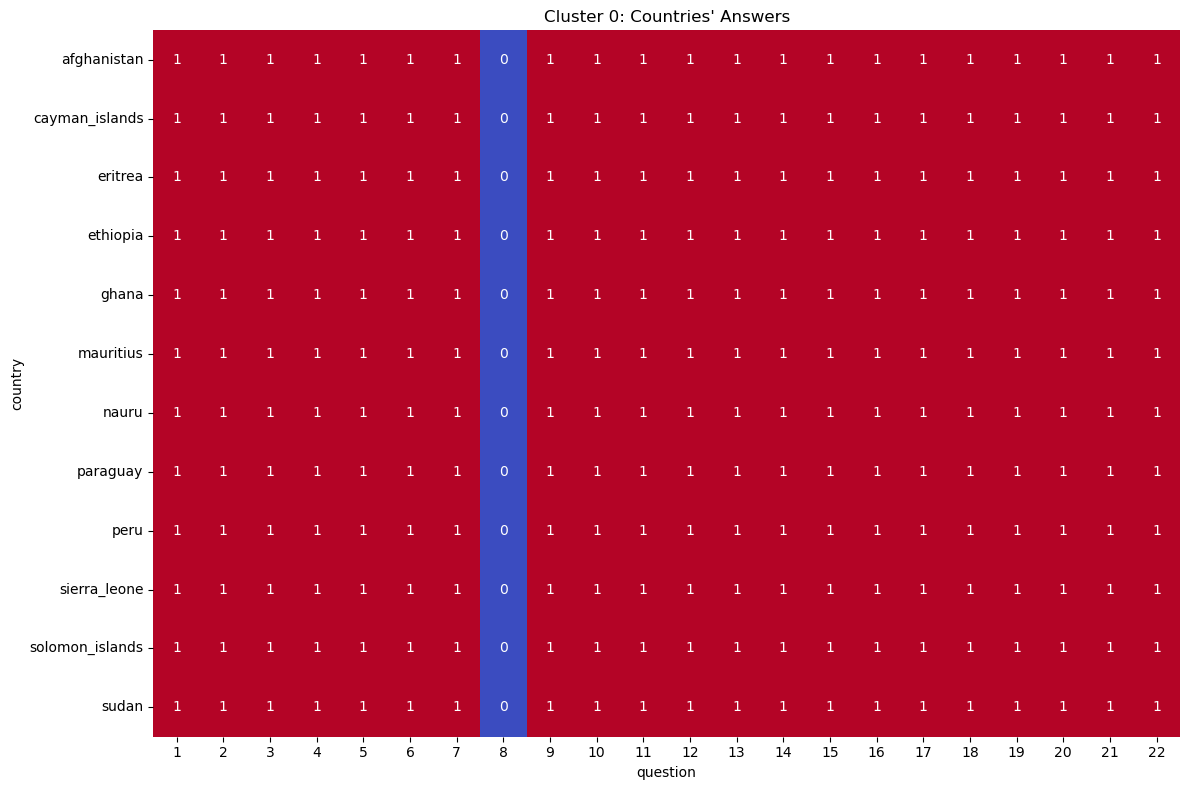

In [101]:
# Extract Cluster 0 data
cluster_0_data = heatmap_data[heatmap_data['Cluster'] == 0]

# Plot heatmap for Cluster 0
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_0_data.drop(columns=['Cluster']), annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.title("Cluster 0: Countries' Answers")
plt.tight_layout()
plt.show()


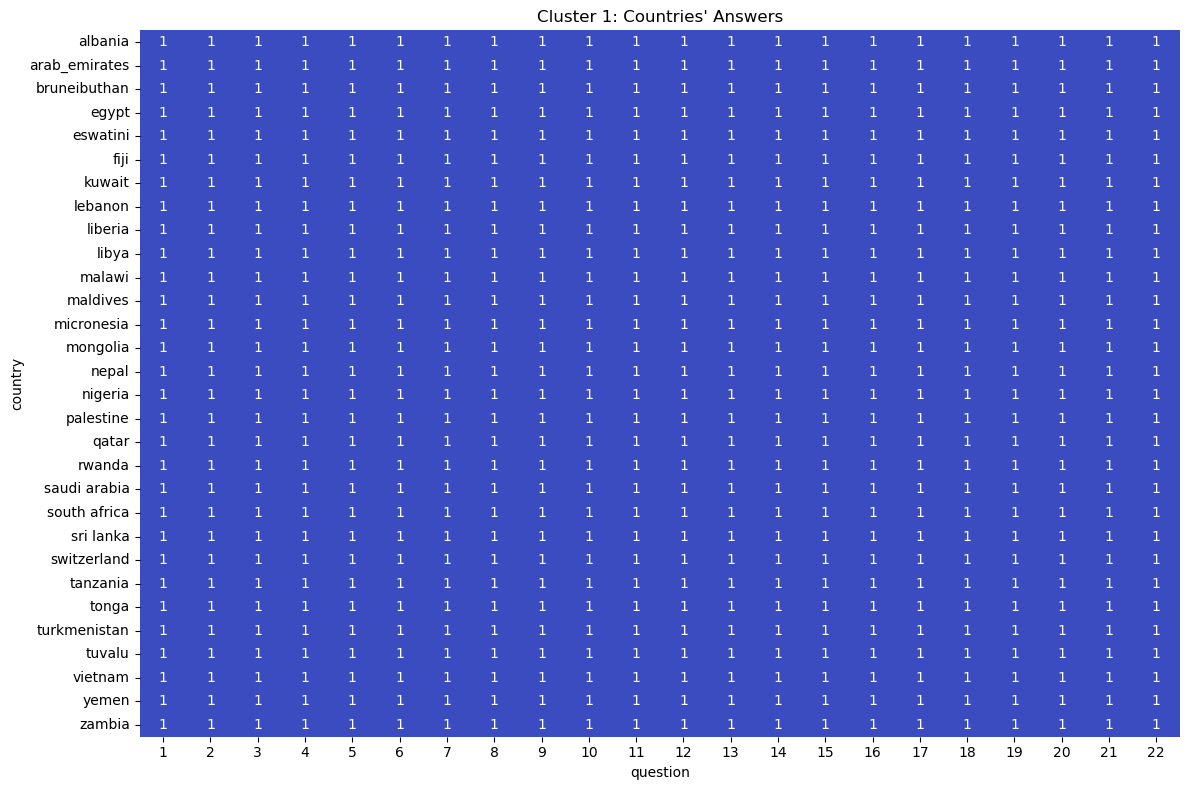

In [117]:
# Extract Cluster 0 data
cluster_0_data = heatmap_data[heatmap_data['Cluster'] == 1]

# Plot heatmap for Cluster 0
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_0_data.drop(columns=['Cluster']), annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.title("Cluster 1: Countries' Answers")
plt.tight_layout()
plt.show()


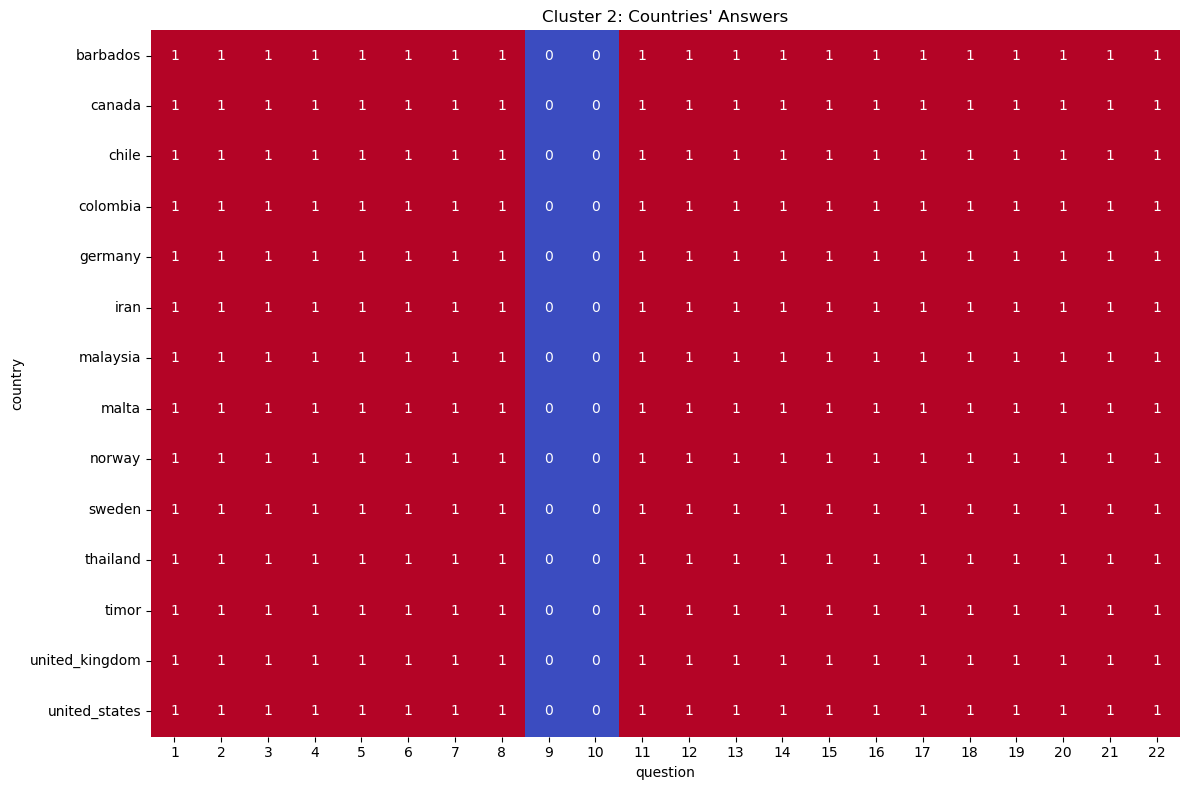

In [119]:
# Extract Cluster 0 data
cluster_0_data = heatmap_data[heatmap_data['Cluster'] == 2]

# Plot heatmap for Cluster 0
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_0_data.drop(columns=['Cluster']), annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.title("Cluster 2: Countries' Answers")
plt.tight_layout()
plt.show()


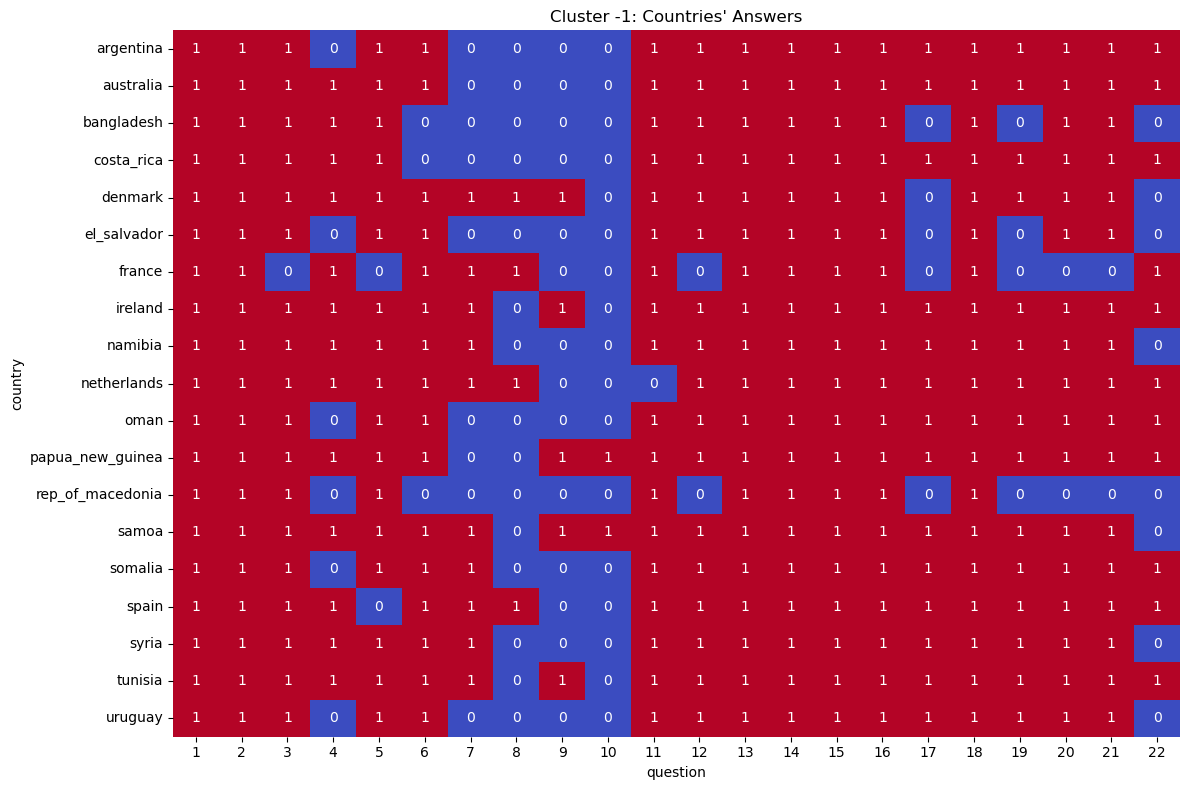

In [121]:
# Extract Cluster 0 data
cluster_0_data = heatmap_data[heatmap_data['Cluster'] == -1]

# Plot heatmap for Cluster 0
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_0_data.drop(columns=['Cluster']), annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.title("Cluster -1: Countries' Answers")
plt.tight_layout()
plt.show()


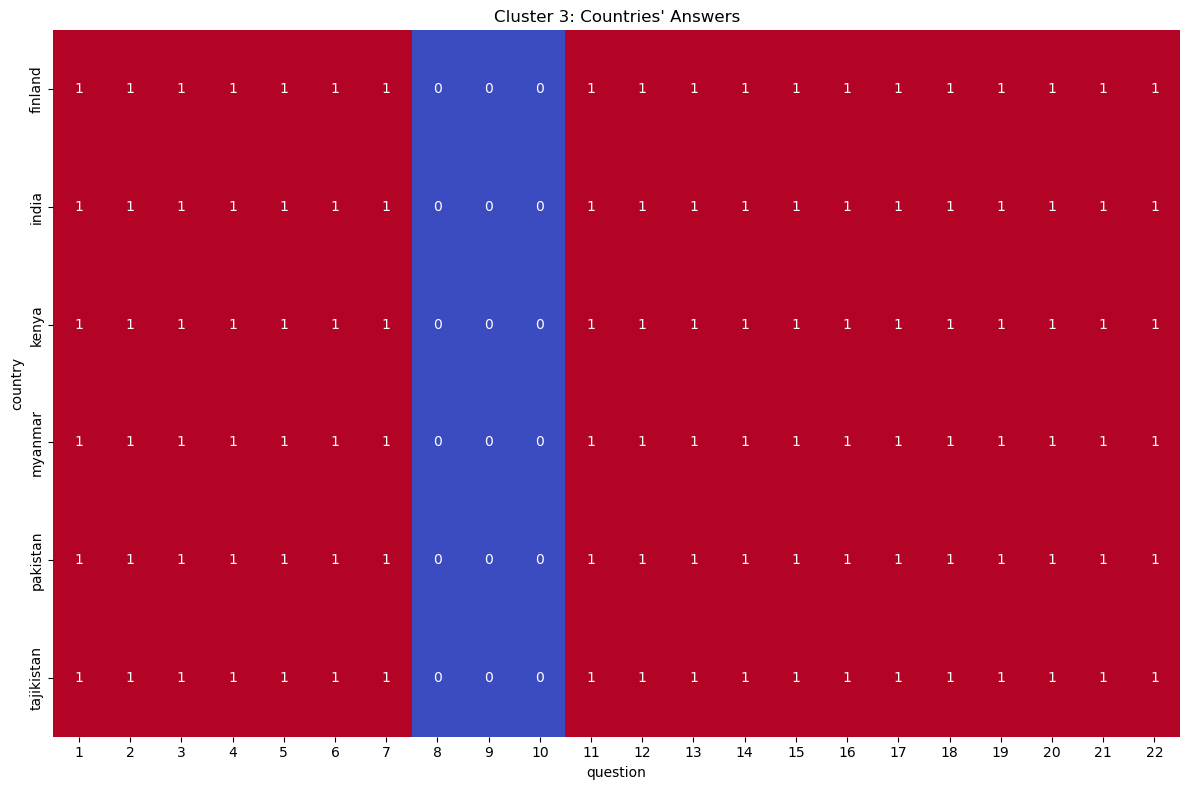

In [123]:
# Extract Cluster 0 data
cluster_0_data = heatmap_data[heatmap_data['Cluster'] == 3]

# Plot heatmap for Cluster 0
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_0_data.drop(columns=['Cluster']), annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.title("Cluster 3: Countries' Answers")
plt.tight_layout()
plt.show()
